# Análisis de datos de eventos deportivos con Pandas en Python

## Importar las librerías necesarias

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar los datos desde los archivos CSV

In [109]:
aficionados_df = pd.read_csv('./workspace/aficionados.csv')
eventos_df = pd.read_csv('./workspace/eventos.csv')
promociones_df = pd.read_csv('./workspace/promociones.csv')

In [110]:
# Revisar los primeros registros de los dataframes
aficionados_df.head()
eventos_df.head()
promociones_df.head()


,id_promocion,medio_publicitario,presupuesto,fecha_inicio,fecha_fin,id_evento
0,1,Radio,8880,2023-01-01,2023-01-06,23
1,2,Radio,15767,2023-01-06,2023-01-11,23
2,3,Internet,6804,2023-01-11,2023-01-16,3
3,4,Redes Sociales,5520,2023-01-16,2023-01-21,7
4,5,Radio,19598,2023-01-21,2023-01-26,17


In [111]:
# Información de los dataframes
aficionados_df.info()
eventos_df.info()
promociones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_aficionado         50 non-null     int64 
 1   nombre_aficionado     50 non-null     object
 2   edad                  50 non-null     int64 
 3   género                50 non-null     object
 4   ubicación_residencia  50 non-null     object
 5   id_evento             50 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_evento           50 non-null     int64 
 1   nombre_evento       50 non-null     object
 2   fecha_evento        50 non-null     object
 3   ubicación_evento    50 non-null     object
 4   asistentes_totales  50 non-null     int64 
dtypes: in

In [112]:
# Verificar duplicados en 'id_evento' en el DataFrame de aficionados
if aficionados_df['id_evento'].duplicated().any():
    print("Advertencia: Hay duplicados en 'id_evento' en el archivo de aficionados.")

Advertencia: Hay duplicados en 'id_evento' en el archivo de aficionados.


In [113]:
# Verificar si hay valores nulos en 'id_evento' antes de la limpieza
print("Número de filas antes de la limpieza:", aficionados_df.shape[0])
print("Número de valores nulos en 'id_evento':", aficionados_df['id_evento'].isnull().sum())

Número de filas antes de la limpieza: 50
Número de valores nulos en 'id_evento': 0


## Limpieza de datos: Eliminar filas con valores nulos

In [114]:
aficionados_df_clean = aficionados_df.dropna()
eventos_df_clean = eventos_df.dropna()
promociones_df_clean = promociones_df.dropna()

In [115]:
# Asegurarse de que las columnas de fechas estén correctamente formateadas
eventos_df_clean['fecha_evento'] = pd.to_datetime(eventos_df_clean['fecha_evento'], errors='coerce')
promociones_df_clean['fecha_inicio'] = pd.to_datetime(promociones_df_clean['fecha_inicio'], errors='coerce')
promociones_df_clean['fecha_fin'] = pd.to_datetime(promociones_df_clean['fecha_fin'], errors='coerce')


## Combinación de los DataFrames usando 'id_evento'

In [116]:
merged_df = pd.merge(aficionados_df_clean, eventos_df_clean, on='id_evento', how='inner')
merged_df = pd.merge(merged_df, promociones_df_clean, on='id_evento', how='inner')

## Responde las siguientes preguntas de negocio

### 1. ¿Cuál es el evento con mayor asistencia total?

Evento con mayor asistencia total:
 nombre_evento         Evento 29
asistentes_totales         9879
Name: 36, dtype: object


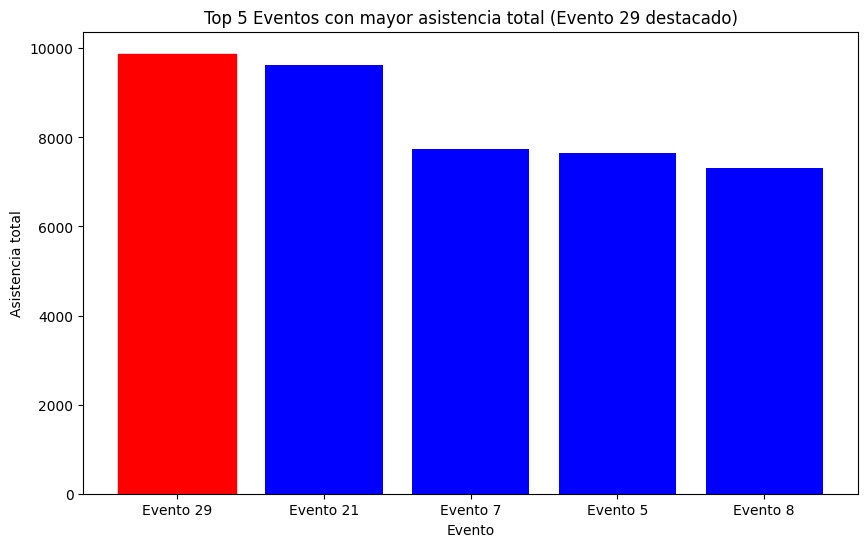

In [117]:
evento_mayor_asistencia = merged_df.loc[merged_df['asistentes_totales'].idxmax()]
print("Evento con mayor asistencia total:\n", evento_mayor_asistencia[['nombre_evento','asistentes_totales']])

# 1. Gráfico de los 5 eventos con mayor asistencia total, destacando el "Evento 29"
top_5_eventos = merged_df.groupby('nombre_evento')['asistentes_totales'].max().nlargest(5).reset_index()

plt.figure(figsize=(10,6))

# Asignar colores manualmente destacando el "Evento 29"
bars = plt.bar(top_5_eventos['nombre_evento'], top_5_eventos['asistentes_totales'], color='blue')

# Cambiar el color de "Evento 29"
for bar, event in zip(bars, top_5_eventos['nombre_evento']):
    if event == 'Evento 29':
        bar.set_color('red')

plt.title('Top 5 Eventos con mayor asistencia total (Evento 29 destacado)')
plt.ylabel('Asistencia total')
plt.xlabel('Evento')
plt.show()


### 2. ¿Cuál es el rango de edad que asiste más frecuentemente a los eventos?

Rangos de edad más frecuentes: ['19-25', '36-45']


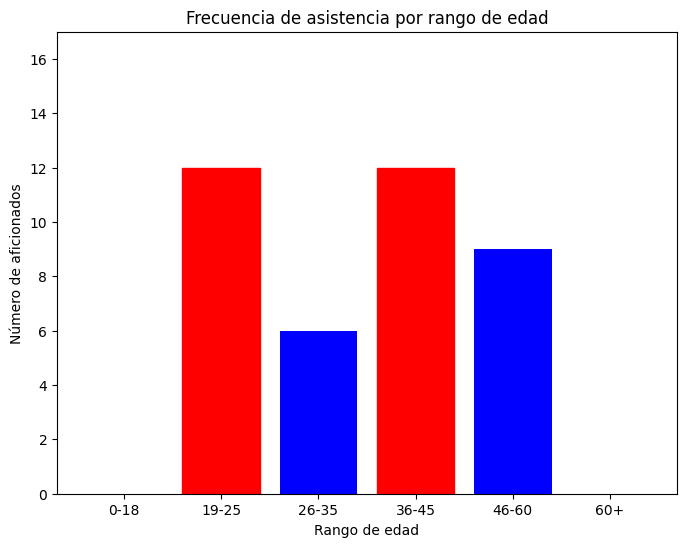

In [118]:
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']
merged_df['rango_edad'] = pd.cut(merged_df['edad'], bins=bins, labels=labels)

# Encontrar los rangos con la mayor frecuencia
max_frecuencia = merged_df['rango_edad'].value_counts().max()
rangos_mas_frecuentes = merged_df['rango_edad'].value_counts()[merged_df['rango_edad'].value_counts() == max_frecuencia].index.tolist()

# Imprimir los rangos de edad con mayor frecuencia
print("Rangos de edad más frecuentes:", rangos_mas_frecuentes)

# Crear un gráfico de barras resaltando los rangos de edad más frecuentes
plt.figure(figsize=(8,6))
# Contar el número de asistentes por rango de edad
rango_edad_frecuencia = merged_df['rango_edad'].value_counts().sort_index()
# Crear barras
bars = plt.bar(rango_edad_frecuencia.index, rango_edad_frecuencia.values, color='blue')

# Resaltar los rangos de edad más frecuentes en rojo
for bar, rango in zip(bars, rango_edad_frecuencia.index):
    if rango in rangos_mas_frecuentes:
        bar.set_color('red')
# Añadir títulos y etiquetas
plt.title('Frecuencia de asistencia por rango de edad')
plt.ylabel('Número de aficionados')
plt.xlabel('Rango de edad')
plt.ylim(0, rango_edad_frecuencia.max() + 5)  # Ajustar el límite del eje Y
plt.show()

### # 3. ¿Qué medio publicitario ha generado mayor impacto en términos de asistencia?

Medio publicitario con mayor impacto: TV


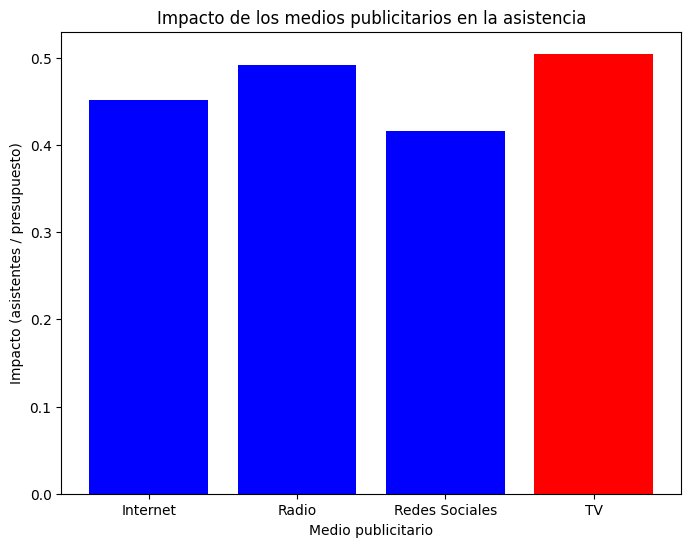

In [119]:
merged_df['impacto_promocion'] = merged_df['asistentes_totales'] / merged_df['presupuesto']
impacto_medio_publicitario = merged_df.groupby('medio_publicitario')['impacto_promocion'].mean().idxmax()
print("Medio publicitario con mayor impacto:", impacto_medio_publicitario)

# Gráfico del impacto de cada medio publicitario
# Crear un DataFrame con el impacto medio por medio publicitario
impacto_medio_publicitario_df = merged_df.groupby('medio_publicitario')['impacto_promocion'].mean().reset_index()

# Gráfico del impacto de cada medio publicitario
plt.figure(figsize=(8,6))

# Asignar colores: rojo para el medio con mayor impacto, azul para los demás
colors = ['red' if medio == impacto_medio_publicitario else 'blue' for medio in impacto_medio_publicitario_df['medio_publicitario']]

# Crear el gráfico de barras con los colores
plt.bar(impacto_medio_publicitario_df['medio_publicitario'], impacto_medio_publicitario_df['impacto_promocion'], color=colors)

# Añadir títulos y etiquetas
plt.title('Impacto de los medios publicitarios en la asistencia')
plt.ylabel('Impacto (asistentes / presupuesto)')
plt.xlabel('Medio publicitario')
plt.show()

### 4. ¿Cuál es la ubicación de residencia que más aficionados aporta a los eventos?

Ubicación de residencia que más aporta Ciudad A


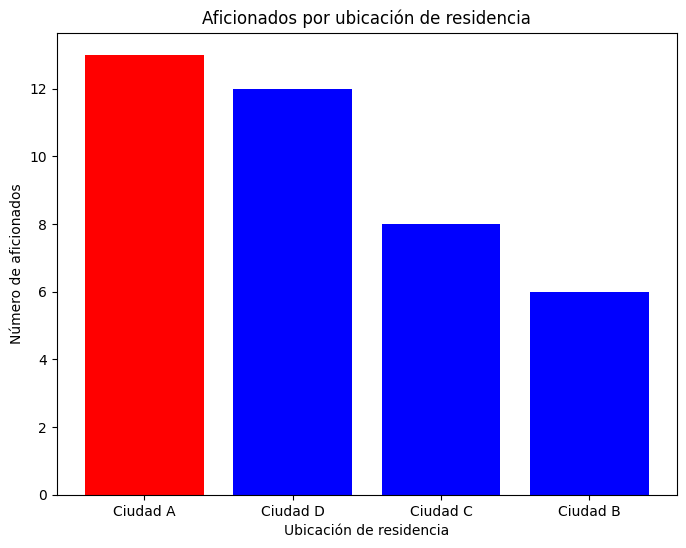

In [120]:
ubicacion_mas_aficionados = merged_df['ubicación_residencia'].value_counts().idxmax()
print("Ubicación de residencia que más aporta", ubicacion_mas_aficionados)

# Gráfico de la ubicación que más aficionados aporta
# Crear el DataFrame que cuenta los aficionados por ubicación de residencia
ubicacion_mas_aficionados_df = merged_df['ubicación_residencia'].value_counts().reset_index()
ubicacion_mas_aficionados_df.columns = ['ubicación_residencia', 'n_aficionados']
plt.figure(figsize=(8,6))
# Asignar colores: rojo para la ubicación que más aporta, azul para las demás
colors = ['red' if ubicacion == ubicacion_mas_aficionados else 'blue' for ubicacion in ubicacion_mas_aficionados_df['ubicación_residencia']]
# Crear el gráfico de barras
plt.bar(ubicacion_mas_aficionados_df['ubicación_residencia'], ubicacion_mas_aficionados_df['n_aficionados'], color=colors)
# Añadir títulos y etiquetas
plt.title('Aficionados por ubicación de residencia')
plt.ylabel('Número de aficionados')
plt.xlabel('Ubicación de residencia')
plt.show()


## Exportar el DataFrame resultante a un archivo CSV
Guarda el DataFrame resultante con todas las transformaciones y análisis en un archivo CSV llamado reporte_eventos.csv utilizando la función df.to_csv()

In [121]:
# Renombrar las columnas para mayor claridad
merged_df_renombrado = merged_df.rename(columns={
    'impacto_promocion': 'Impacto de la promoción (Asistentes/Presupuesto)',
    'nombre_evento': 'Nombre del Evento',
    'asistentes_totales': 'Asistentes Totales',
    'medio_publicitario': 'Medio Publicitario',
    'ubicación_residencia': 'Ubicación de Residencia',
    'n_aficionados': 'Número de Aficionados',
    'presupuesto': 'Presupuesto de la Promoción'
})

# Reordenar las columnas para mayor claridad antes de exportar
columnas_ordenadas = ['Nombre del Evento', 'Asistentes Totales', 'Medio Publicitario', 'Impacto de la promoción (Asistentes/Presupuesto)', 'Ubicación de Residencia', 'Presupuesto de la Promoción']

# Exportar el DataFrame final a un archivo CSV
merged_df_renombrado[columnas_ordenadas].to_csv('./workspace/reporte_eventos.csv', index=False)
print("Datos exportados correctamente a reporte_eventos.csv")

Datos exportados correctamente a reporte_eventos.csv


In [123]:
# Renombrar las columnas para mayor claridad
merged_df_renombrado = merged_df.rename(columns={
    'impacto_promocion': 'Impacto de la promoción (Asistentes/Presupuesto)',
    'nombre_evento': 'Nombre del Evento',
    'asistentes_totales': 'Asistentes Totales',
    'medio_publicitario': 'Medio Publicitario',
    'ubicación_residencia': 'Ubicación de Residencia',
    'presupuesto': 'Presupuesto de la Promoción',
    'fecha_inicio': 'Fecha de Inicio de la Promoción',
    'fecha_fin': 'Fecha de Fin de la Promoción',
    'id_promocion': 'ID de la Promoción'
})

# Reordenar las columnas para mayor claridad antes de exportar
columnas_ordenadas = [
    'Nombre del Evento', 
    'Asistentes Totales', 
    'Ubicación de Residencia', 
    'Medio Publicitario', 
    'ID de la Promoción',    
    'Impacto de la promoción (Asistentes/Presupuesto)',     
    'Presupuesto de la Promoción', 
    'Fecha de Inicio de la Promoción', 
    'Fecha de Fin de la Promoción'
]

# Exportar el DataFrame final a un archivo CSV sin incluir los índices
merged_df_renombrado[columnas_ordenadas].to_csv('./workspace/reporte_eventos.csv', index=False)
print("Datos exportados correctamente a reporte_eventos.csv")


Datos exportados correctamente a reporte_eventos.csv
